# Question 1

In [1]:
import yfinance as yf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yesg

### Step 1: Download Monthly Stock Price Data

In [21]:
# Download monthly stock price data for Hewlett-Packard Co from 2015 to 2019
hpq_data = yf.download('HPQ', start='2014-12-01', end='2019-12-31', interval='1mo')

[*********************100%%**********************]  1 of 1 completed


### Step 2: Calculate Monthly Log Returns and Annualized Return

In [22]:
# Calculate monthly log returns based on Adjusted Close
hpq_data['Log_Returns'] = np.log(hpq_data['Adj Close'] / hpq_data['Adj Close'].shift(1))

# Drop any rows with NaN values
hpq_data = hpq_data.dropna()

In [23]:
# Calculate annualized return
annualized_return = hpq_data['Log_Returns'].mean() * 12
print(f'Annualized Return: {annualized_return * 100:.2f}%')

Annualized Return: 5.33%


### Step 3: Calculate Annualized Volatility

In [24]:
# Calculate annualized volatility
annualized_volatility = hpq_data['Log_Returns'].std() * np.sqrt(12)
print(f'Annualized Volatility: {annualized_volatility * 100:.2f}%')

Annualized Volatility: 26.52%


### Step 4: Download ESG Data and Handle Missing Values

In [39]:
# Download ESG data for Hewlett-Packard Co (HPQ)
esg_hpq = yesg.get_historic_esg('HPQ')

# select for the same timeframe
start_date = "2015-01-01"
end_date = "2019-12-31"
esg_data_df = esg_hpq.loc[start_date:end_date]

# Drop NaN values
esg_hpq_cleaned = esg_data_df.fillna(method='ffill')

# select for the Total-Score
esg_hpq_total_score = esg_hpq_cleaned.loc[:, 'Total-Score']

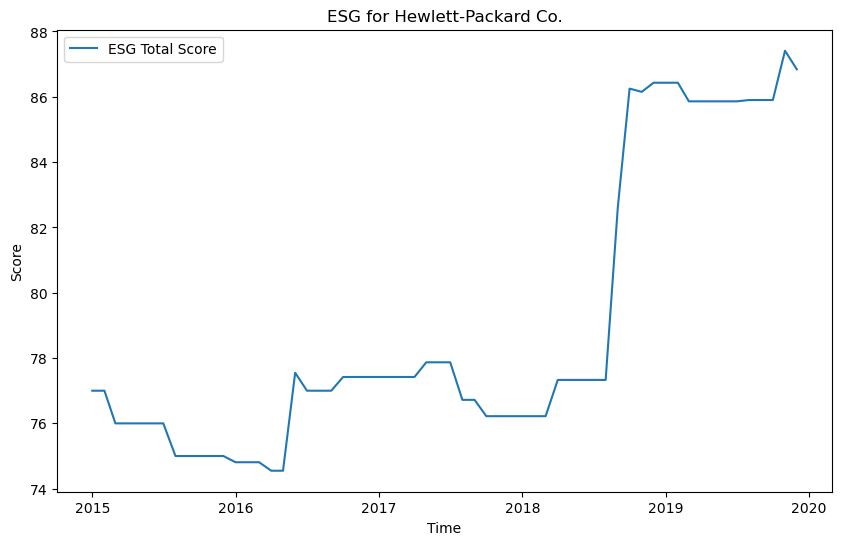

In [45]:
# Plot ESG Data
plt.figure(figsize=(10, 6))
plt.plot(esg_hpq_total_score,label='ESG Total Score')
plt.xlabel('Time')
plt.ylabel('Score')
plt.title('ESG for Hewlett-Packard Co.')
plt.legend()
plt.show()

### Step 5: Calculate and Analyse the Correlation between Stock Price and ESG

In [49]:
# Compute the correlation coefficient
correlation = hpq_data['Adj Close'].corr(esg_hpq_total_score)
# Print the correlation
print(f"The correlation between the stock price and its ESG Total Score for HPQ from January 1, 2015, to December 31, 2019 is {correlation:.4f}")

The correlation between the stock price and its ESG Total Score for HPQ from January 1, 2015, to December 31, 2019 is 0.5671


# Question 2: Cooling Degree Days (CDD) Calculation for Zhengzhou

### Data Collection

In [50]:
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from meteostat import Point, Daily

### Setting the Time Period

In [51]:
# Set the time period for April 2022
start = datetime(2022, 4, 1)
end = datetime(2022, 4, 30)

### Specifying the Location

In [60]:
# Latitude, Longitude, and Altitude for Zhengzhou
latitude = 34.7466
longitude = 113.6254
altitude = 110 
location = Point(34.7466, 113.6254, 110)

### Fetching the Daily Data

In [61]:
# Fetch daily weather data for Zhengzhou
data = Daily(location, start, end)
data = data.fetch()

### Plotting the Temperature Data

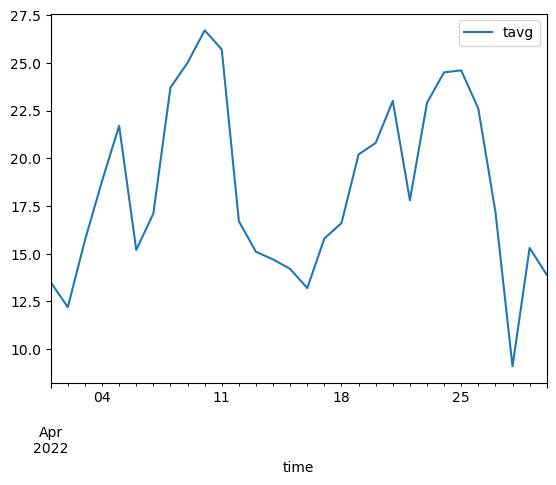

In [62]:
# Plot the average temperature
data.plot(y=['tavg'])
plt.show()

### Calculating Cooling Degree Days

###### Cooling Degree Days (CDD) are a measure used to quantify the demand for energy needed to cool a building. The CDD is calculated as the difference between a day's average temperature and a base temperature, only considering days that are warmer than the base temperature.

In [63]:
# Base temperature for CDD calculation (in Celsius)
T_base = 18

In [64]:
# Calculate CDD on each day of the month.
cdds = [max(temp - T_base, 0) for temp in data['tavg']]
dates = pd.date_range(start='2022-04-01', end='2022-04-30') 
cdds_df = pd.DataFrame({'Date': dates, 'CDD': cdds})

In [65]:
# Calculate the sum of the CDDs for the period in question.
total_cdd = sum(cdds)

In [66]:
# Show results
print("Total CDD for Zhengzhou in April 2022:", total_cdd)
# Display the DataFrame
print(cdds_df)

Total CDD for Zhengzhou in April 2022: 66.19999999999999
         Date  CDD
0  2022-04-01  0.0
1  2022-04-02  0.0
2  2022-04-03  0.0
3  2022-04-04  0.8
4  2022-04-05  3.7
5  2022-04-06  0.0
6  2022-04-07  0.0
7  2022-04-08  5.7
8  2022-04-09  7.0
9  2022-04-10  8.7
10 2022-04-11  7.7
11 2022-04-12  0.0
12 2022-04-13  0.0
13 2022-04-14  0.0
14 2022-04-15  0.0
15 2022-04-16  0.0
16 2022-04-17  0.0
17 2022-04-18  0.0
18 2022-04-19  2.2
19 2022-04-20  2.8
20 2022-04-21  5.0
21 2022-04-22  0.0
22 2022-04-23  4.9
23 2022-04-24  6.5
24 2022-04-25  6.6
25 2022-04-26  4.6
26 2022-04-27  0.0
27 2022-04-28  0.0
28 2022-04-29  0.0
29 2022-04-30  0.0
